# Exploring NLP Fuzzy Matching Algorithms - THEFUZZ package


Student Name: Aliasgar Saria

Topic: Exploration of NLP Fuzzy Python Package - Fuzzywuzzy / Thefuzz

Date: 10th April 2023

## Fuzzy / Approximate String Matching

- Method to find strings which match a pattern approximately.
- Identifies the likelihood/probability that two records are true match based on some parameters.


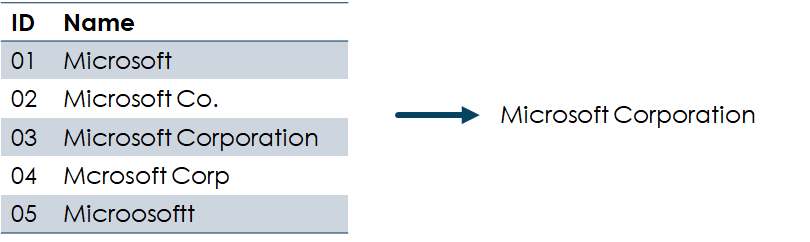

## Applications of String Matching

- Spell checker
- Deduplication of records
- Master data management
- Plagiarism detection
- Bioinformatics and DNA sequencing
- Spam filtering
- Content search

<a id = 'algo'></a>

## Fuzzy Matching Algorithms

- Edit distance metric - quantifies and calculates how dissimilar two strings are by counting the minimum number of operations required to transform one string into the other
    - Levenshtein distance
    - Damerau–Levenshtein distance


## String Edit Distance Metrics

Measures the number of edits needed to transform one word into another



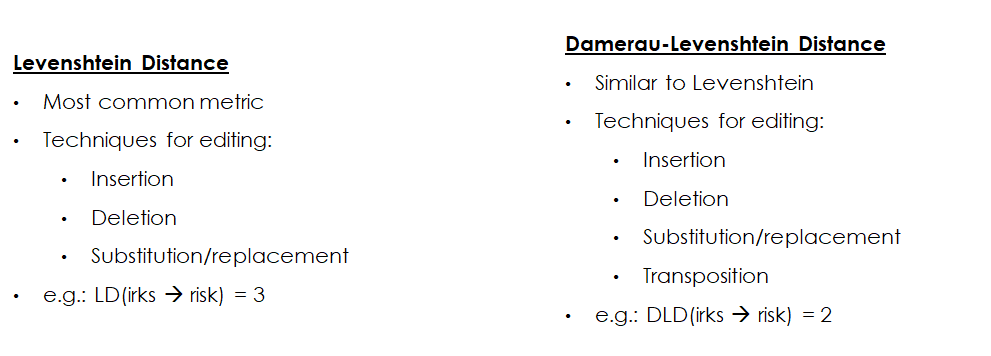

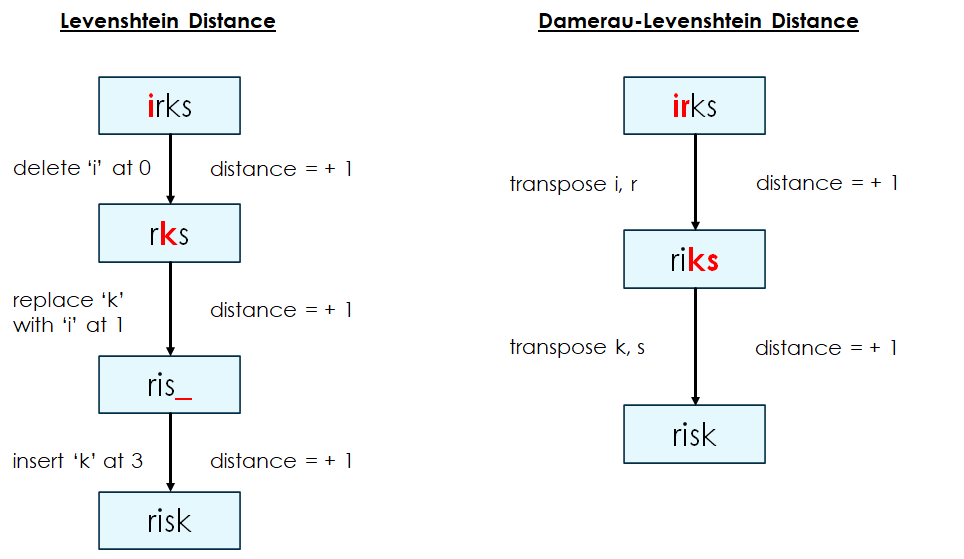

## Levenshtein distance

Levenshtein distance has the following properties:

- It is zero if and only if the strings are equal.
- It is at least the difference of the sizes of the two strings.
- It is at most the length of the longer string.
- Triangle inequality: The Levenshtein distance between two strings is no greater than the sum of their Levenshtein distances from a third string.


The Levenshtein distance between two strings a,b (of length {|a| and |b| respectively) is given by lev(a,b) where

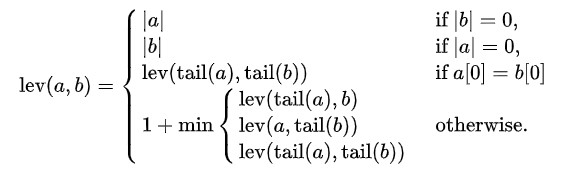

where the tail of some string x is a string of all but the first character of x, and x[n] is the nth character of the string x starting with character 0.

In [29]:
def levdist(s, t):
    '''function to calculate the
    Levenshtein distance between
    two strings in a recursive way'''
    
    if s == '':
        return len(t)
    if t == '':
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    dist = min([levdist(s[:-1], t)+1,
               levdist(s, t[:-1])+1, 
               levdist(s[:-1], t[:-1]) + cost])

    return dist

In [55]:
levdist('irks', 'risk')

3

In [56]:
import time

st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', levdist(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 25.01 s


## Damerau-Levenshtein Distance

To try this algorithm, we need to use the 'jellyfish' package which is a library for approximate & phonetic matching of strings.
Source: https://pypi.org/project/jellyfish/

In [57]:
import jellyfish

print('Levenshtein distance is: ', jellyfish.levenshtein_distance('irks', 'risk'))
print('Damerau-Levenshtein distance is: ', jellyfish.damerau_levenshtein_distance('irks', 'risk'))

Levenshtein distance is:  3
Damerau-Levenshtein distance is:  2


In [58]:
st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Damerau-Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', jellyfish.damerau_levenshtein_distance(s1, s2))
et = time.time()
print('Time taken to calculate Damerau-Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Damerau-Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
Time taken to calculate Damerau-Levenshtein distance between  micrsft  and  microsoft corporation  is: 0.0 s


## Difference between Damerau-Levenshtein and Levenshtein distance?

The main difference between the two distances is that the Damerau-Levenshtein distance also considers transpositions as valid operations, while the Levenshtein distance only considers insertions, deletions, and substitutions.
The calculation complexity is higher in Damerau-Levenshtein but the resultant speed of computation makes it worth the implementation.

**Working of Levenshtein**
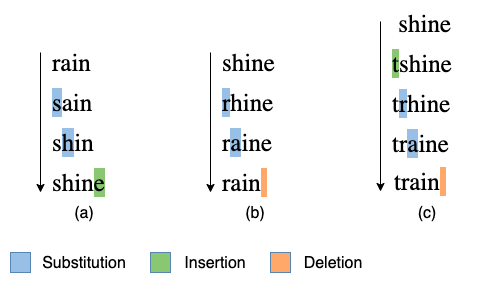





**Working of Damerau-Levenshtein**
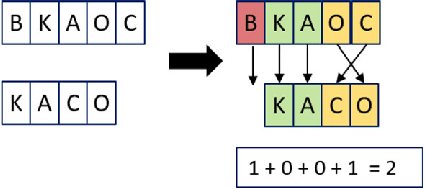

<a id = 'ngram'></a>

<a id = 'real'></a>

# FuzzyWuzzy / Thefuzz package


   Thefuzz (formerly Fuzzywuzzy) is a Python library that provides a simple way to apply various string matching algorithms including the Levenshtein and Damerau-Levenshtein distances, as well as other algorithms such as the Jaro-Winkler distance and token set ratio. It provides a convenient interface for comparing strings and returning a similarity score between 0 and 100, where 100 indicates a perfect match and 0 indicates no match at all.

   Thefuzz also has a feature called partial ratio, which allows it to compare partial strings and return a score based on the similarity of the matching substrings. This feature can be useful when comparing longer strings or when dealing with typos or minor differences in spelling.
   
Source: https://pypi.org/project/thefuzz/

Git: https://github.com/seatgeek/thefuzz

To install: 

Using PIP via PyPI:     pip install thefuzz

To install levenshtein: pip install levenshtein

Using PIP via Github: pip install git+git://github.com/seatgeek/thefuzz.git@0.19.0#egg=thefuzz

Documentation: https://smashedtoatoms.github.io/the_fuzz/api-reference.html



## Example Uses of modules

In [35]:
# Install these packages if not done so already
# pip install thefuzz
# pip install levenshtein

**Importing Libraries**

In [36]:
import pandas as pd
from thefuzz import fuzz
from thefuzz import process


**Ratio matching**

In [59]:
# We can determine the simple ratio between two strings using the ratio() method on the fuzz object. 
name = "Johnny D Wick"
full_name = "Johny D Walk"

print(f"Similarity score: {fuzz.ratio(name, full_name)}")


Similarity score: 80


**Partial Ratio matching**

In [60]:
# To check the partial ratio, all we must do to the code above is call partial_ratio() on our fuzz object instead of ratio().
name = "Johnny D Wick"
full_name = "Johny D Walk"

print(f"Similarity score: {fuzz.partial_ratio(name, full_name)}")


Similarity score: 75


Why decrease in score? 

partial_ratio() seeks to find how partially similar two strings are. Two strings are partially similar if they have some of the words in a common order. 
The partial_ratio() calculates the similarity by taking the shortest string,

In [15]:
fuzz.ratio("YANKEES", "NEW YORK YANKEES")

61

In [16]:
fuzz.ratio("NEW YORK METS", "NEW YORK YANKEES")

76

In [17]:
fuzz.partial_ratio("YANKEES", "NEW YORK YANKEES")

100

In [18]:
fuzz.partial_ratio("NEW YORK METS", "NEW YORK YANKEES")

69

**fuzz.token_sort_ratio()**:  Tokenizes words and compares them in different orders

The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. For example:

"new york mets vs atlanta braves" -> "atlanta braves mets new vs york"
We then compare the transformed strings with a simple ratio()


In [19]:
fuzz.token_sort_ratio("New York Mets vs Atlanta Braves", "Atlanta Braves vs New York Mets")

100

**fuzz.token_set_ratio()**:  Here, we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.

In [20]:
t0 = "angels mariners"
t1 = "angels mariners vs"
t2 = "angels mariners anaheim angeles at los of seattle"
fuzz.ratio(t0, t1)

91

In [21]:
fuzz.ratio(t0, t2)

47

In [22]:
fuzz.ratio(t1, t2) 

51

In [23]:
fuzz.token_set_ratio("mariners vs angels", "los angeles angels of anaheim at seattle mariners")

91

**Process Module using Thefuzz**

If we have a list of strings and we want to find the closest matching string from the list with a given string, we can leverage the ‘process’ module.

In [47]:
from thefuzz import process
query = 'My name is Jackie Daytona'
choices = ['My name Jackie Daytona', 'My name is Jackie Daytona', 'My Jackie Daytona']  
# Get a list of matches ordered by score, default limit to 5
process.extract(query, choices)

[('My name is Jackie Daytona', 100),
 ('My name Jackie Daytona', 95),
 ('My Jackie Daytona', 95)]

In [48]:
#If we want to extract out the top match, we can run the following code:
process.extractOne(query, choices)


('My name is Jackie Daytona', 100)

# Onto Dataset handling using the 'thefuzz' library

We are using the data contains two columns for room type descriptions. Column 1 is the description from Expedia, and column 2 is the associated room type in Booking.com.

### Download data [here from Kaggle](https://www.kaggle.com/leandrodoze/room-type)


<u> **Aim:**</u> is to compare and match these two columns and the result would be 'human like understanding that the matched entries are same'.


In [52]:
import pandas as pd
from thefuzz import fuzz
from thefuzz import process
from thefuzz import *

In [39]:
data_df = pd.read_csv(r"C:\Users\tasne\Python Project\roomtype.csv")

In [40]:
data_df.head()

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room


#### RATIO - Compares the entire string similarity

In [53]:
def get_ratio(row):
    
    '''function to compare the values in each row for the two columns in the same dataframe and
    return the ratio for the entire string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.ratio(col1, col2)

#### PARTIAL RATIO - Compares partial string similarity

In [42]:
def get_partial_ratio(row):
    
    '''function to compare the values in each row for the two columns in the same dataframeand
    return the ratio for partial string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.partial_ratio(col1, col2)

#### TOKEN SORT RATIO - Ignores word order

In [54]:
def get_token_sort_ratio(row):
    
    '''function to compare the values in each row for the two columns in the same dataframe and
    return the ratio for string similarity by ignoring word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_sort_ratio(col1, col2)

#### TOKEN SET RATIO - Ignore duplicate words similarly to token sort ratio

In [45]:
def get_token_set_ratio(row):
    
    '''function to compare the values in each row for the two columns in the same dataframeand
    return the ratio for string similarity by ignoring duplicate words and word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_set_ratio(col1, col2)

In [46]:
data_df['full_ratio'] = data_df.apply(get_ratio, axis=1)
data_df['partial_ratio'] = data_df.apply(get_partial_ratio, axis=1)
data_df['token_sort_ratio'] = data_df.apply(get_token_sort_ratio, axis=1)
data_df['token_set_ratio'] = data_df.apply(get_token_set_ratio, axis=1)
data_df.head()

,Expedia,Booking.com,full_ratio,partial_ratio,token_sort_ratio,token_set_ratio
0,"Deluxe Room, 1 King Bed",Deluxe King Room,62,69,84,100
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible,68,65,78,81
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room,79,100,80,100
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite,51,65,85,100
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room,76,82,90,100


####  It looks like TOKEN SET RATIO from thefuzzz package is the best method to get the most similar matches in this example.

<a id = 'others'></a>

## Other Fuzzy Matching algorithms

- Edit distance 
    - Longest common subsequence 
    - Hamming distance
    - Jaro distance
- Needleman–Wunsch algorithm
- Smith–Waterman algorithm
- BK Tree metric
- Soundex or Metaphone – phonetic algorithms 



# REFERENCES
1. https://www.analyticsvidhya.com/blog/2021/06/fuzzywuzzy-python-library-interesting-tool-for-nlp-and-text-analytics/
2. https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
3. Exploring NLP Fuzzy Matching Algorithms - https://www.youtube.com/watch?v=__Ysw69Hiw0
4. String Matching - https://www.youtube.com/watch?v=4L0Py4GkmPU
5. https://www.geeksforgeeks.org/fuzzywuzzy-python-library/
6. https://www.datacamp.com/tutorial/fuzzy-string-python
7. https://www.javatpoint.com/fuzzywuzzy-python-library
8. https://github.com/mnathvt/nlp_fuzzy_match_algorithms

